In [23]:
import numpy as np
import random 
from IPython.display import clear_output
import gym
import time
from matplotlib import pyplot as plt

In [24]:
# if you want to see the simulated version just uncomment the following line
# env = gym.make("Taxi-v3" , render_mode = 'human')

env = gym.make("Taxi-v3")

In [25]:
num_of_states = env.observation_space.n
num_of_actions = env.action_space.n
Qtable = np.zeros([num_of_states , num_of_actions])

In [26]:
episodes = 10000
epochs_per_episode = 1000

# alpha and gama
learning_rate = 0.1
discount_rate = 0.99

# exploration configurations
exploration_rate = 1
exploration_decay_rate = 0.001
min_exploration_rate = 0.1

rewards_per_episodes = []

In [27]:
for episode in range(episodes):
    state, _ = env.reset()
    episode_reward = 0
    done = False

    # print("EPISODE", episode+1)

    for epoch in range(epochs_per_episode):
        # env.render()
        random_number = random.uniform(0, 1)

        action = 0
        if random_number > exploration_rate:
            # EXPLOITATION
            action = np.argmax(Qtable[state, :])
        else:
            # EXPLORATION
            action = env.action_space.sample()

        new_state, reward, done, info, _ = env.step(action=action)
        Qtable[state, action] = (1-learning_rate)*Qtable[state, action] + \
            learning_rate * (reward + discount_rate *
                             np.max(Qtable[new_state, :]))
        episode_reward += reward
        state = new_state
        if done:
            if reward == 20:
                print("EPISODE" , episode)
            # clear_output(wait=True)
            # time.sleep(0.5)
            break
    exploration_rate = min_exploration_rate + \
        (1 - min_exploration_rate) * \
        np.exp(-1*exploration_decay_rate*episode)

    rewards_per_episodes.append(episode_reward)

env.close()

/home/sobi/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


EPISODE 0
EPISODE 4
EPISODE 6
EPISODE 9
EPISODE 12
EPISODE 15
EPISODE 17
EPISODE 19
EPISODE 22
EPISODE 24
EPISODE 25
EPISODE 26
EPISODE 31
EPISODE 34
EPISODE 37
EPISODE 38
EPISODE 39
EPISODE 41
EPISODE 43
EPISODE 44
EPISODE 46
EPISODE 48
EPISODE 53
EPISODE 54
EPISODE 55
EPISODE 61
EPISODE 62
EPISODE 68
EPISODE 69
EPISODE 71
EPISODE 74
EPISODE 77
EPISODE 78
EPISODE 80
EPISODE 81
EPISODE 82
EPISODE 86
EPISODE 88
EPISODE 89
EPISODE 92
EPISODE 93
EPISODE 96
EPISODE 97
EPISODE 98
EPISODE 99
EPISODE 100
EPISODE 101
EPISODE 102
EPISODE 103
EPISODE 104
EPISODE 105
EPISODE 106
EPISODE 108
EPISODE 109
EPISODE 110
EPISODE 111
EPISODE 113
EPISODE 114
EPISODE 115
EPISODE 117
EPISODE 118
EPISODE 119
EPISODE 120
EPISODE 121
EPISODE 122
EPISODE 123
EPISODE 125
EPISODE 126
EPISODE 127
EPISODE 128
EPISODE 129
EPISODE 130
EPISODE 132
EPISODE 133
EPISODE 134
EPISODE 136
EPISODE 137
EPISODE 138
EPISODE 139
EPISODE 140
EPISODE 141
EPISODE 143
EPISODE 144
EPISODE 145
EPISODE 146
EPISODE 147
EPISODE 148
EPISO

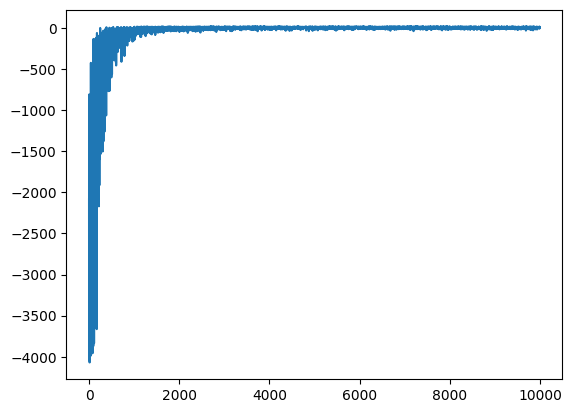

In [28]:
plt.plot(rewards_per_episodes)
plt.show()